In [4]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helper

# To allow for inline rendering of plots.
%matplotlib inline

In [3]:
data, X_train, y_train, X_test, y_test, movies_data = helper.load_data('data/data.txt',
'data/train.txt', 'data/test.txt', 'data/movies.txt')

In [15]:
# Array stores total of user ratings and number of ratings
movie_ratings = np.zeros((len(movies_data), 2))

In [28]:
# Loop through data set
for d in data:
    # Add user's rating for corresponding movie
    movie_ratings[int(d[1] - 1)][0] += d[2]
    # Count of ratings per movie
    movie_ratings[int(d[1] - 1)][1] += 1

all_ratings = data[:,2]

In [ ]:
print(all_ratings).shape

In [17]:
avgs = np.zeros(len(movies_data))
for i, m in enumerate(movie_ratings):
    all_ratings[i] = m[1]
    if m[1] != 0:
        avgs[i] = m[0] / m[1]

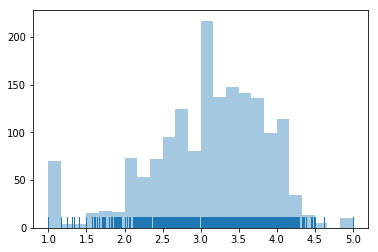

In [10]:
sns.distplot(avgs, kde=False, rug=True)

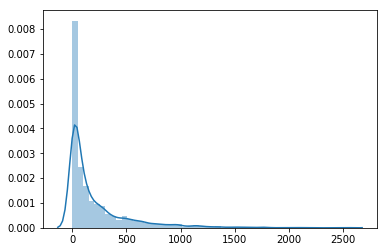

In [15]:
sns.distplot(movie_ratings[:,0])

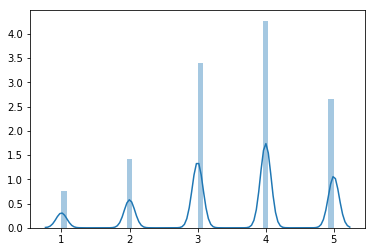

In [39]:
sns.distplot(all_ratings)

In [35]:
print(all_ratings.shape)

(100000,)


Text(0.5,1,'All Ratings in MovieLens Histogram')

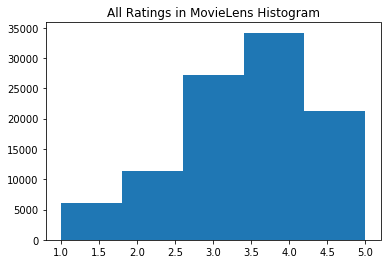

In [47]:
all_ratings_hist = plt.hist(all_ratings, bins = 5)
plt.title('All Ratings in MovieLens Histogram')
